<a href="https://colab.research.google.com/github/karim-dev-coder/sample-test-for-game-dev/blob/main/2_Virtual_metro_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Блокнот для поиска пути и количество пересадок для метро в виртуальном городе
Блокнот содержит визуализаци, алгоритмы расчета, кастомный алгоритм Дейкстры и проверку логику через тесты

# Конфигурируем граф для расчета Дейкстры через networkx
Граф понадобится для визуализации и для проверки кастомного алгоритма Дейкстры

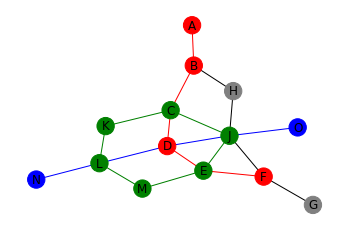

In [2]:
graph_dict = {
    # Красная ветка
    'A': ['B'],
    'B': ['C', 'H'],
    'C': ['D', 'J'],
    'D': ['E', 'J'],
    'E': ['F', 'M'],
    'F': ['G'],
    # Зеленая ветка
    'J': ['E', 'O', 'F'],
    'K': ['C'],
    'L': ['K', 'D'],
    'M': ['L'],
    # Синяя ветка
    'N' : ['L'],
    'O' : [],
    # Черная линия
    'H': ['J'],
    'G': []
}

# Создание графа
metro_graph = nx.Graph(graph_dict)

# Добавление красной ветки метро
node_colors = {'A': 'red', 'B': 'red', 'C': 'red', 'D': 'red', 'E': 'red', 'F': 'red'}
edge_colors = {('A', 'B'): 'red', ('B', 'C'): 'red', ('C', 'D'): 'red', ('D', 'E'): 'red', ('E', 'F'): 'red'}

# Добавление зеленой ветки метро
node_colors.update({'C': 'green', 'K': 'green', 'J': 'green', 'E': 'green', 'M': 'green', 'L': 'green'})
edge_colors.update({('C', 'K'): 'green', ('C', 'J'): 'green', ('E', 'J'): 'green', ('E', 'M'): 'green', ('L', 'M'): 'green', ('K', 'L'): 'green'})

# Добавление синей ветки метро
node_colors.update({'N': 'blue', 'O': 'blue'})
edge_colors.update({('L', 'N'): 'blue', ('D', 'L'): 'blue', ('D', 'J'): 'blue', ('J', 'O'): 'blue'})

# Добавление черной ветки метро
node_colors.update({'H': 'grey', 'G': 'grey'})
edge_colors.update({('B', 'H'): 'black', ('J', 'H'): 'black', ('F', 'J'): 'black', ('F', 'G'): 'black'})

# Визуализация графа с раскраской
pos = nx.spring_layout(metro_graph, seed=27)
nx.draw_networkx_nodes(metro_graph, pos, node_color=[node_colors[n] for n in metro_graph.nodes()])
nx.draw_networkx_edges(metro_graph, pos, edge_color=[edge_colors[e] for e in metro_graph.edges()])
nx.draw_networkx_labels(metro_graph, pos)
plt.axis('off')
plt.show()

Логика, которая считает количество пересадок по найденному пути

In [3]:
# Словарь для расчета пересадок
metro = {
    'red_line': ['A', 'B', 'C', 'D', 'E'],
    'green_line': ['C', 'J', 'E', 'M', 'L', 'K'],
    'blue_line': ['N', 'L', 'D', 'J', 'O'],
    'black_line': ['B', 'H', 'G', 'F', 'G']
    }

In [4]:
# Считаем пересадки, которые нужно совершить, чтобы проехать по пути path.
def calculate_needed_transfer(path, metro):
  line_transfers = []
  transfers_on_path = list(zip(path[:-1], path[1:]))
  for transfer in transfers_on_path:
    line = get_common_line(transfer, metro)

    if line_transfers == []:
      line_transfers.append(line)
      continue

    if line_transfers[-1] != line:
      line_transfers.append(line)
  
  return line_transfers

In [5]:
# Нахожим общую линию, через которую можно совершить трансфер с точки А до Б.
def get_common_line(transfer, metro):
  a_station_lines = get_lines_belongs_station(transfer[0], metro)
  b_station_lines = get_lines_belongs_station(transfer[1], metro)

  # Находим общие линию для двух смежных станций
  setStation = set(a_station_lines) & set(b_station_lines)
  return ''.join(setStation)

In [6]:
# Берем количество линий на которых расположена станция
def get_lines_belongs_station(station, metro):
  belong_lines = []
  for line in metro:
    if station in metro[line]:
      belong_lines.append(line)

  return belong_lines

# Алгоритм Дейкстры
Проверяется по тестам ниже

In [7]:
from collections import deque

def bfs_shortest_path(graph, start, end):
    # Создаем словарь, в котором будем хранить посещенные вершины и предыдущую вершину на пути от start до данной вершины.
    visited = {start: None}
    # Создаем очередь, в которую будем помещать вершины для обхода.
    queue = deque([start])
    # Проходим по очереди, пока она не опустеет.
    while queue:
        # Извлекаем из очереди первую вершину.
        current_node = queue.popleft()
        # Если достигли конечной вершины, то выходим из цикла.
        if current_node == end:
            break
        # Проходим по всем соседним вершинам текущей вершины.
        for neighbor in graph[current_node]:
            # Если соседняя вершина еще не посещена, то помечаем ее как посещенную и добавляем в очередь.
            if neighbor not in visited:
                visited[neighbor] = current_node
                queue.append(neighbor)
    # Если конечная вершина не найдена, то возвращаем None.
    if end not in visited:
        return None
    # В противном случае восстанавливаем путь от end до start и возвращаем его.
    path = []
    current_node = end
    while current_node is not None:
        path.append(current_node)
        current_node = visited[current_node]
    path.reverse()
    return path


# Тесты
Сначала проверяем тест кейсы по алгоритму networkx
Потом проверяем кастомный алгоритм дейкстры по тест кейсам

In [8]:
class ExpectedResult:
  def __init__(self, path, transfers_count):
    self.path = path
    self.transfers_count = transfers_count

class TestCase:
  def __init__(self, start, end, expected):
    self.start = start
    self.end = end
    self.expected = expected
  
  def get_name(self):
    return 'from ' + self.start + ' to ' + self.end

In [9]:
def execute_networkx_test(test, networkx, metro, graph_dict):
  metro_graph = nx.Graph(graph_dict)

  path = networkx.dijkstra_path(metro_graph, source=test.start, target=test.end)
  
  transfers = calculate_needed_transfer(path, metro)
  transfers_count_without_start_landing = len(transfers) - 1

  if path != test.expected.path:
    raise Exception(test.get_name() + ' is failed!. Expected path: [' + ' '.join(test.expected.path) + '], but was [' + ' '.join(path) + ']')

  if transfers_count_without_start_landing != test.expected.transfers_count:
    raise Exception(test.get_name() + ' is failed!. Expected transfer count: ' + str(test.expected.transfers_count) + ', but was ' + str(transfers_count_without_start_landing))

In [10]:
def execute_custom_algorithm_test(test, metro, graph_dict):

  path = bfs_shortest_path(graph_dict, test.start, test.end)

  transfers = calculate_needed_transfer(path, metro)
  transfers_count_without_start_landing = len(transfers) - 1

  if path != test.expected.path:
    raise Exception(test.get_name() + ' is failed!. Expected path: [' + ' '.join(test.expected.path) + '], but was [' + ' '.join(path) + ']')

  if transfers_count_without_start_landing != test.expected.transfers_count:
    raise Exception(test.get_name() + ' is failed!. Expected transfer count: ' + str(test.expected.transfers_count) + ', but was ' + str(transfers_count_without_start_landing))

In [12]:
# Добавляйте сюда тест кейсы. Я хотел использовать это для написания своего алгоритма, но потом писать алгоритм передумал.
tests = [
    TestCase('C', 'L', ExpectedResult(['C', 'D', 'L'], 1)),
    TestCase('A', 'M', ExpectedResult(['A', 'B', 'C', 'D', 'E', 'M'], 1)),
    TestCase('B', 'N', ExpectedResult(['B', 'C', 'D', 'L', 'N'], 1)),
    TestCase('D', 'O', ExpectedResult(['D', 'J', 'O'], 0)),
    TestCase('H', 'K', ExpectedResult(['H', 'B', 'C', 'K'], 2)),
    TestCase('J', 'B', ExpectedResult(['J', 'C', 'B'], 1))
    ]

for test in tests:
  execute_networkx_test(test, nx, metro, graph_dict)
  print(test.get_name() + ' is success with networkx dejkstra')

  # execute_custom_algorithm_test(test, metro, graph_dict)
  # print(test.get_name() + ' is success with my dejkstra algorithm')

print('All tests is success!')

from C to L is success with networkx dejkstra
from A to M is success with networkx dejkstra
from B to N is success with networkx dejkstra
from D to O is success with networkx dejkstra
from H to K is success with networkx dejkstra
from J to B is success with networkx dejkstra
All tests is success!
